# Run Lagrangian CDm

![header](../figures/logos_partenaires_DC_WOC-ESA.jpg)

## Velocity metrics package illustration: Run Lagrangian Cumulative Distance
 

## Agulhas, BFN-QG
 



***
**Authors:** Datlas <br>
**Copyright:** 2023 Datlas <br>
**License:** MIT

<div class="alert alert-block alert-success">
<h1><center>Agulhas: BFNQG currents maps</center></h1>
 <h5><center> The notebook aims to illustrate how to run the velocity metrics. Here, the example uses surface current maps produced by the BFN-QG in the Agulhas region.</center></h5> 
</div>

In [27]:
import velocity_metrics.lagrangian.drifters as drifters
import velocity_metrics.lagrangian.cumulative_distance as sde
import velocity_metrics.utils.constant as const  

In [28]:
import os
import warnings
warnings.filterwarnings("ignore")

## Parameters

### Input directories

In [29]:
input_dict = '../dc_data/DC_example_BFNQG_Agulhas/dictionnaries/'
input_drifter = '../dc_data/drifter/'
input_lagrangian_position = '../dc_data/lagrangian_position_pickle/'

### Output directory

In [30]:
outputdir = '../results/metrics_illustration/'

### Evaluated maps parameters

In [31]:
path_dict_product =  input_dict + 'data_type_metric_illustration_bfnqg.json'  

# Index of the depth of your product (if only one depth and no index, just leave depth = 0)
depth = 0

### Region parameters

In [32]:
path_dict_region = input_dict + 'region_metric_illustration_Agulhas.json'

### Advection parameters

In [33]:
path_drifter_param = input_dict + 'drifters_parameters.ini'

## Using drifter position at 15m depth (also available at 00m depth)

#path_drifter_position = input_lagrangian_position + 'Fictive_pos_Drifters_AOML_region_T1_00m_20190101T000000Z_20200101T000000Z.json'
path_drifter_position = input_lagrangian_position + 'Fictive_pos_Drifters_AOML_region_T1_15m_20190101T000000Z_20200101T000000Z.json' 

first_date = '20190101T000000Z'
last_date = '20190201T000000Z'

advection_days = 10

## 1. Advect drifters 

In [34]:
%%time
_ = drifters.run_all_load_once(path_drifter_param, path_dict_product, path_drifter_position,
                 days_of_advection=advection_days, output_dir=outputdir, region=path_dict_region, 
                 first_date=first_date, last_date=last_date, sdepth=depth)

Percent: [#############################-] 96.77%, , 

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1811/1811 [00:16<00:00, 113.00it/s]


CPU times: user 15.1 s, sys: 663 ms, total: 15.8 s
Wall time: 17.8 s


## 2. Compute SDE

In [35]:
## Using drifter position at 15m depth (also available at 00m depth)

# drifter_list = [input_drifter + 'Drifters_AOML_region_T1_00m_20190101T000000Z_20200101T000000Z.pyo.gz']
drifter_list = [input_drifter + 'Drifters_AOML_region_T1_15m_20190101T000000Z_20200101T000000Z.pyo.gz']

path_artificial_drifters = os.path.join(outputdir, 'data_type_metric_illustration_bfnqg_region_metric_illustration_Agulhas_dep0.pyo.gz')

outputfilename = 'SDE_region_T1_20190101-20190201'

_ = sde.run(path_artificial_drifters, drifter_list, output_dir=outputdir, output_filename=outputfilename)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 41/41 [00:05<00:00,  7.13it/s]


## 3. Plot SDE

<Figure size 640x480 with 0 Axes>

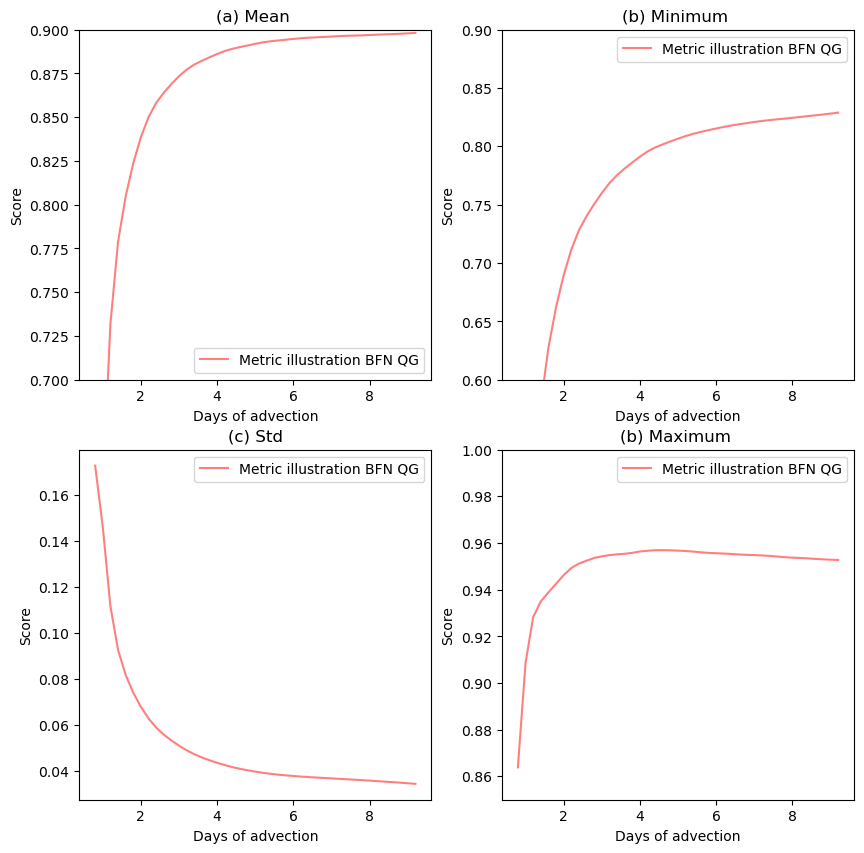

In [36]:
list_sde = [outputdir+'SDE_region_T1_20190101-20190201_BFNQG1_15m.pyo.gz']

outputfilename = 'SDE_BFNQG_region_T1.png'

_ = sde.plot(list_sde, output_dir=outputdir, 
             output_filename=outputfilename,
             list_color=['r'],
             plot_range={'mean': (0.70, 0.9), 'max': (0.85, 1), 'min': (0.6, 0.9)})
